In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
x = np.array([1,2,3,4,5,6])
y = np.array([3,5,6,7,8,9])

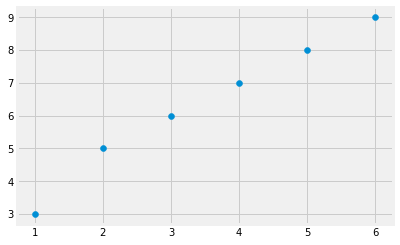

In [3]:
plt.scatter(x,y)

In [4]:
def get_slope(x,y):
    slope = ( ((np.mean(x)*np.mean(y)) - np.mean(x*y)) / 
            (np.mean(x)**2 - np.mean(x**2))
            )
    intercept = np.mean(y) -slope * np.mean(x) 
    return slope,intercept

In [5]:
def regression(x,m,b):
    y = [m*i + b for i in x]
    return y

In [6]:
def squared_error(y_orig,y_line):
    return sum((y_orig - y_line)**2)

def coefficient_of_determination(y_orig,y_line):
    y_mean_line = [np.mean(y) for ys in y_orig]
    squared_error_regr = squared_error(y_orig,y_line)
    squared_error_y_mean = squared_error(y_orig,y_mean_line)
    return 1-(squared_error_regr/squared_error_y_mean)

In [7]:
m,b = get_slope(x,y)
print(m,b)

1.142857142857144 2.3333333333333295


In [8]:
m,b = get_slope(x,y)
print(m,b)
y_pred_test = regression(np.array([7,8,9]),m,b)

1.142857142857144 2.3333333333333295


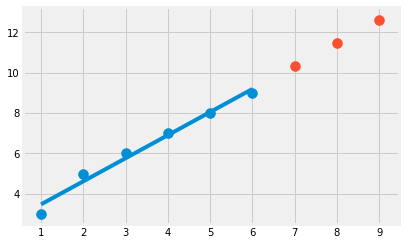

In [9]:
plt.scatter(x,y,s=100)
plt.scatter(np.array([7,8,9]),y_pred_test,s=100)
y_pred_train = regression(x,m,b)
plt.plot(x,y_pred_train)
plt.show()

In [10]:
r = coefficient_of_determination(y,y_pred_train)
print(r)

0.9795918367346939


In [11]:
lr = LinearRegression()

1.0


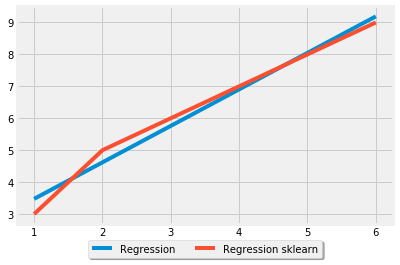

In [12]:

lr.fit( x.reshape(1,-1),y.reshape(1,-1))
y_pred = lr.predict( x.reshape(1,-1))
r = coefficient_of_determination(y.reshape(6,),np.array(y_pred[0]))
print(r)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x,y_pred_train,label = "Regression")
ax.plot(x,y_pred[0],label="Regression sklearn")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.show()